# __Imports__

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.preprocessing import MinMaxScaler

# __Data__

In [113]:
# Load the data
X_cat = pd.read_csv('../data/processed/X_cat.csv')
X_num = pd.read_csv('../data/processed/X_num.csv')
y = pd.read_csv('../data/processed/y.csv')

# __Diagnostics__

## __Descriptive Statistics__

In [106]:
# For each column, print the mean, std, min, max, 255th, 50th, and 75th percentiles
def describe_columns(data):
    for column in data.columns:
        print(column)
        print(data[column].describe())
        print()

In [107]:
describe_columns(X_cat)

School District
count    6025.000000
mean      725.758672
std       408.218850
min         0.000000
25%       414.000000
50%       623.000000
75%      1126.000000
max      1914.000000
Name: School District, dtype: float64

Sector
count    6025.000000
mean        0.146390
std         0.353526
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sector, dtype: float64

If private, does it receive subsidy?
count    882.000000
mean       0.028345
std        0.166050
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If private, does it receive subsidy?, dtype: float64

Zone
count    6025.000000
mean        0.339585
std         0.473608
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Zone, dtype: float64

Department Code
count    6025.000000
mean        7.231867
std         3.909396
min         1.000000
25%         4.

## __Visualizations__

### __Distribution of Features__

In [108]:
def plot_distributions(data, filename, plot_title, typ, wrap_length=20):
    def wrap_title(title, length):
        return '\n'.join(textwrap.wrap(title, length))

    temp = data.drop(['School District', 'Municipality Code'], axis=1) if typ == 'categorical' else data

    columns = temp.columns
    n = len(columns)
    rows = (n + 2) // 3
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    
    axs = axs.flatten()
    
    for i, column in enumerate(columns):
        if typ == 'categorical':
            sns.countplot(data=temp, x=column, ax=axs[i])
        else:
            sns.histplot(data=temp, x=column, ax=axs[i])
        axs[i].set_title(wrap_title(f"{column} ({i})", wrap_length))
        axs[i].set_xlabel('')
    
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    fig.suptitle(plot_title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.show()

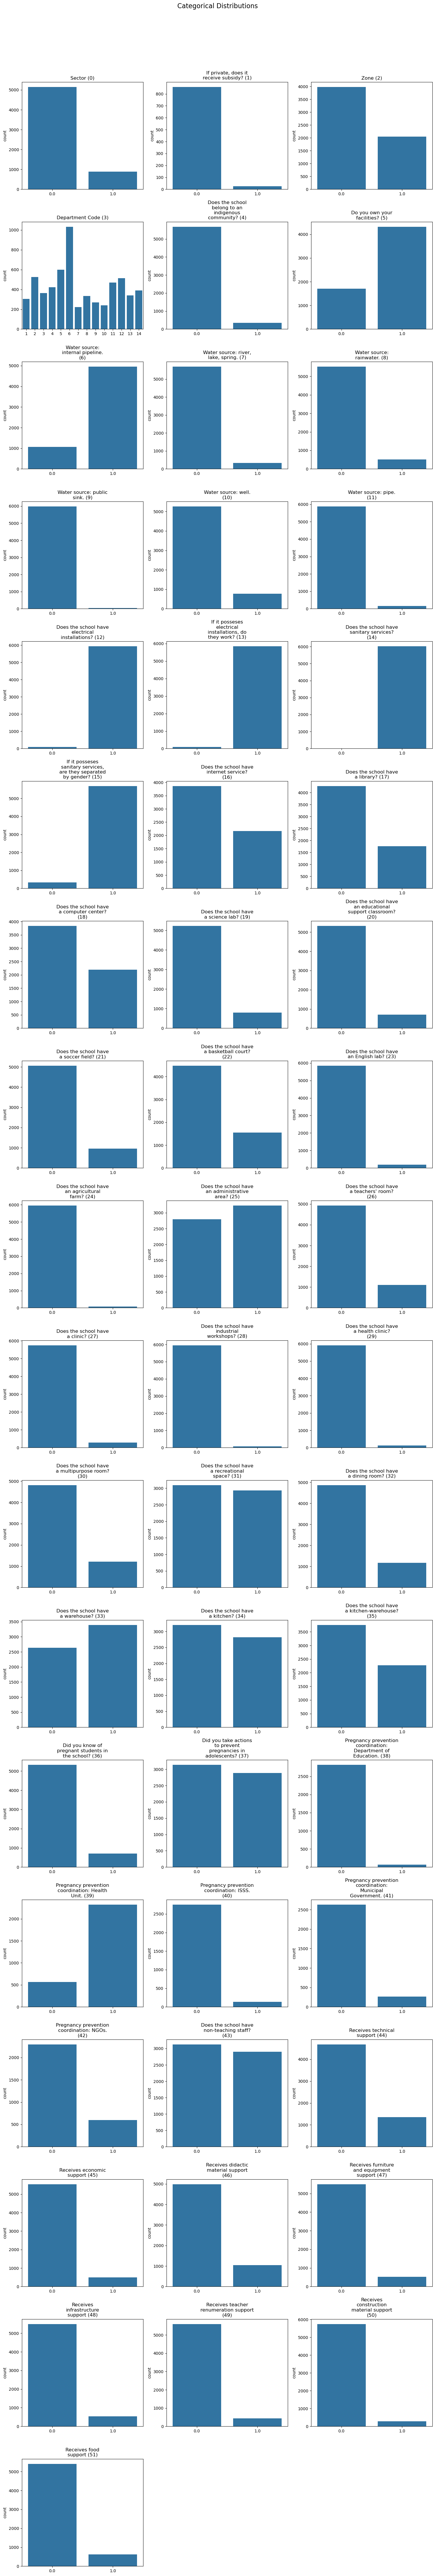

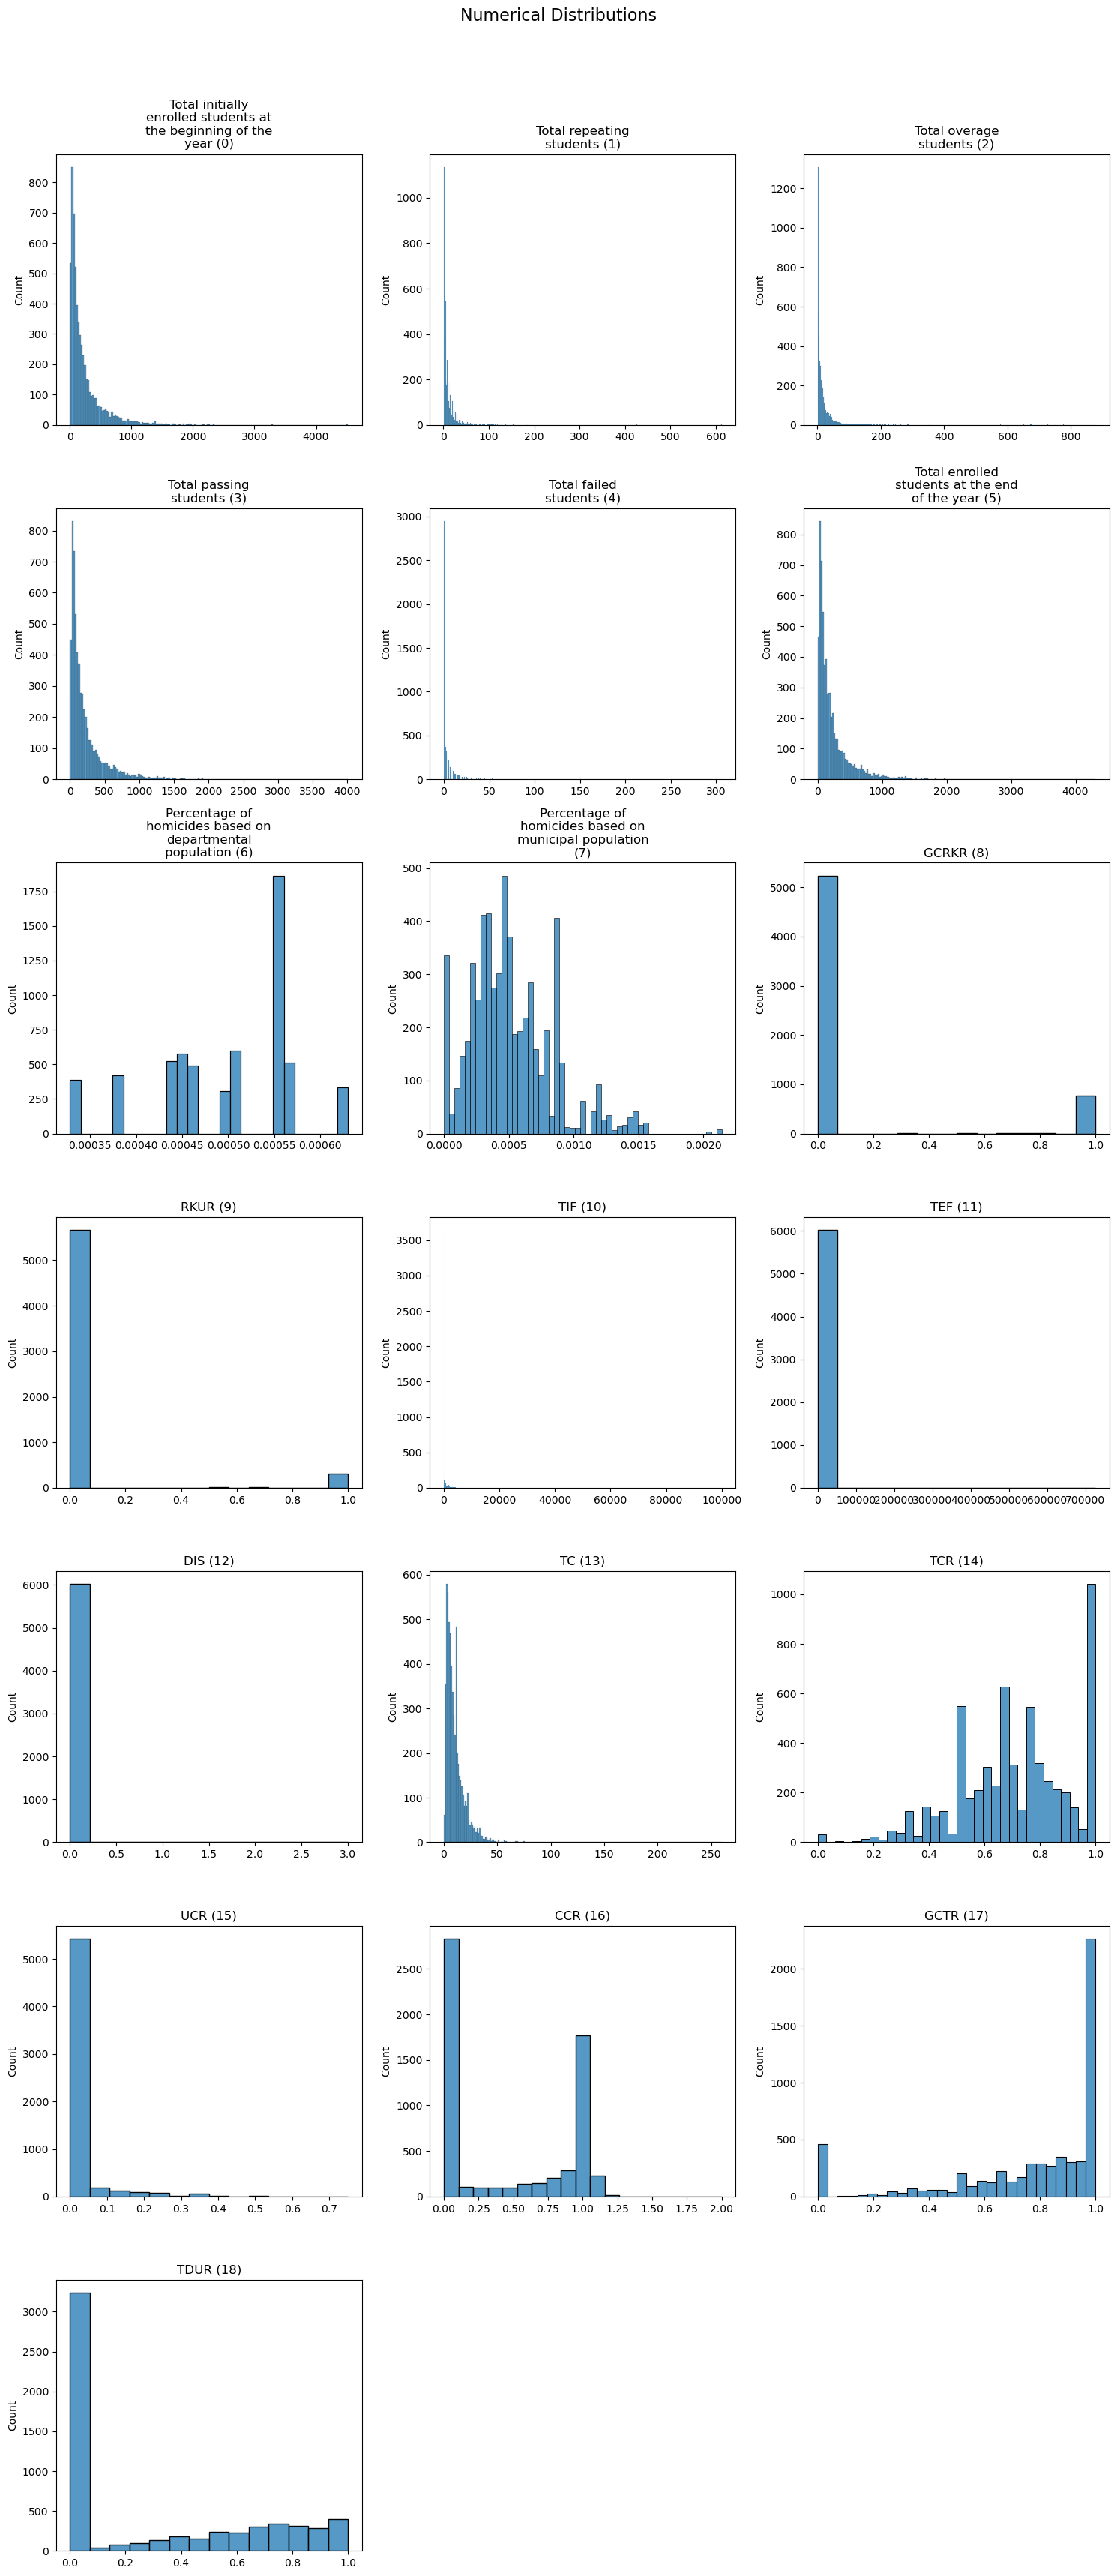

In [109]:
plot_distributions(X_cat, '../reports/categorical.png', 'Categorical Distributions', 'categorical')
plot_distributions(X_num, '../reports/numerical.png', 'Numerical Distributions', 'numerical')

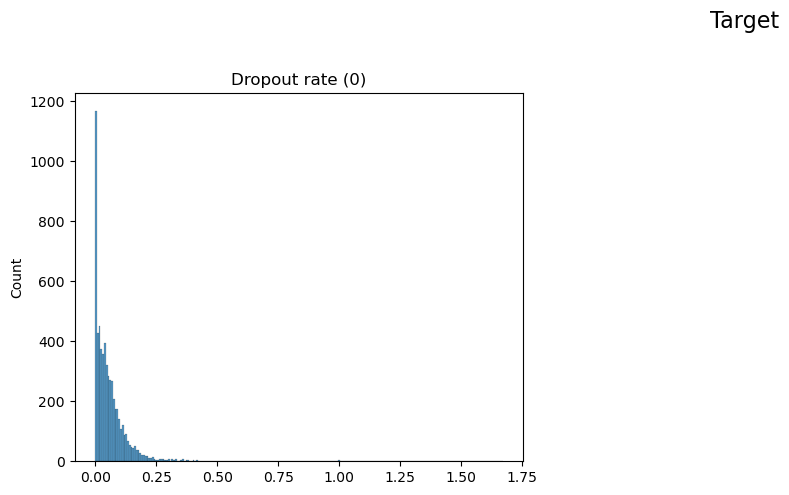

In [110]:
plot_distributions(y, '../reports/target.png', 'Target', 'numerical')

### __Feature Correlations__

In [111]:
def plot_correlation_heatmap(data, filename, plot_title, wrap_length=20):
    def wrap_title(title, length):
        return '\n'.join(textwrap.wrap(title, length))

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, ax=ax)
    ax.set_title(wrap_title(plot_title, wrap_length))
    plt.savefig(filename)
    plt.show()

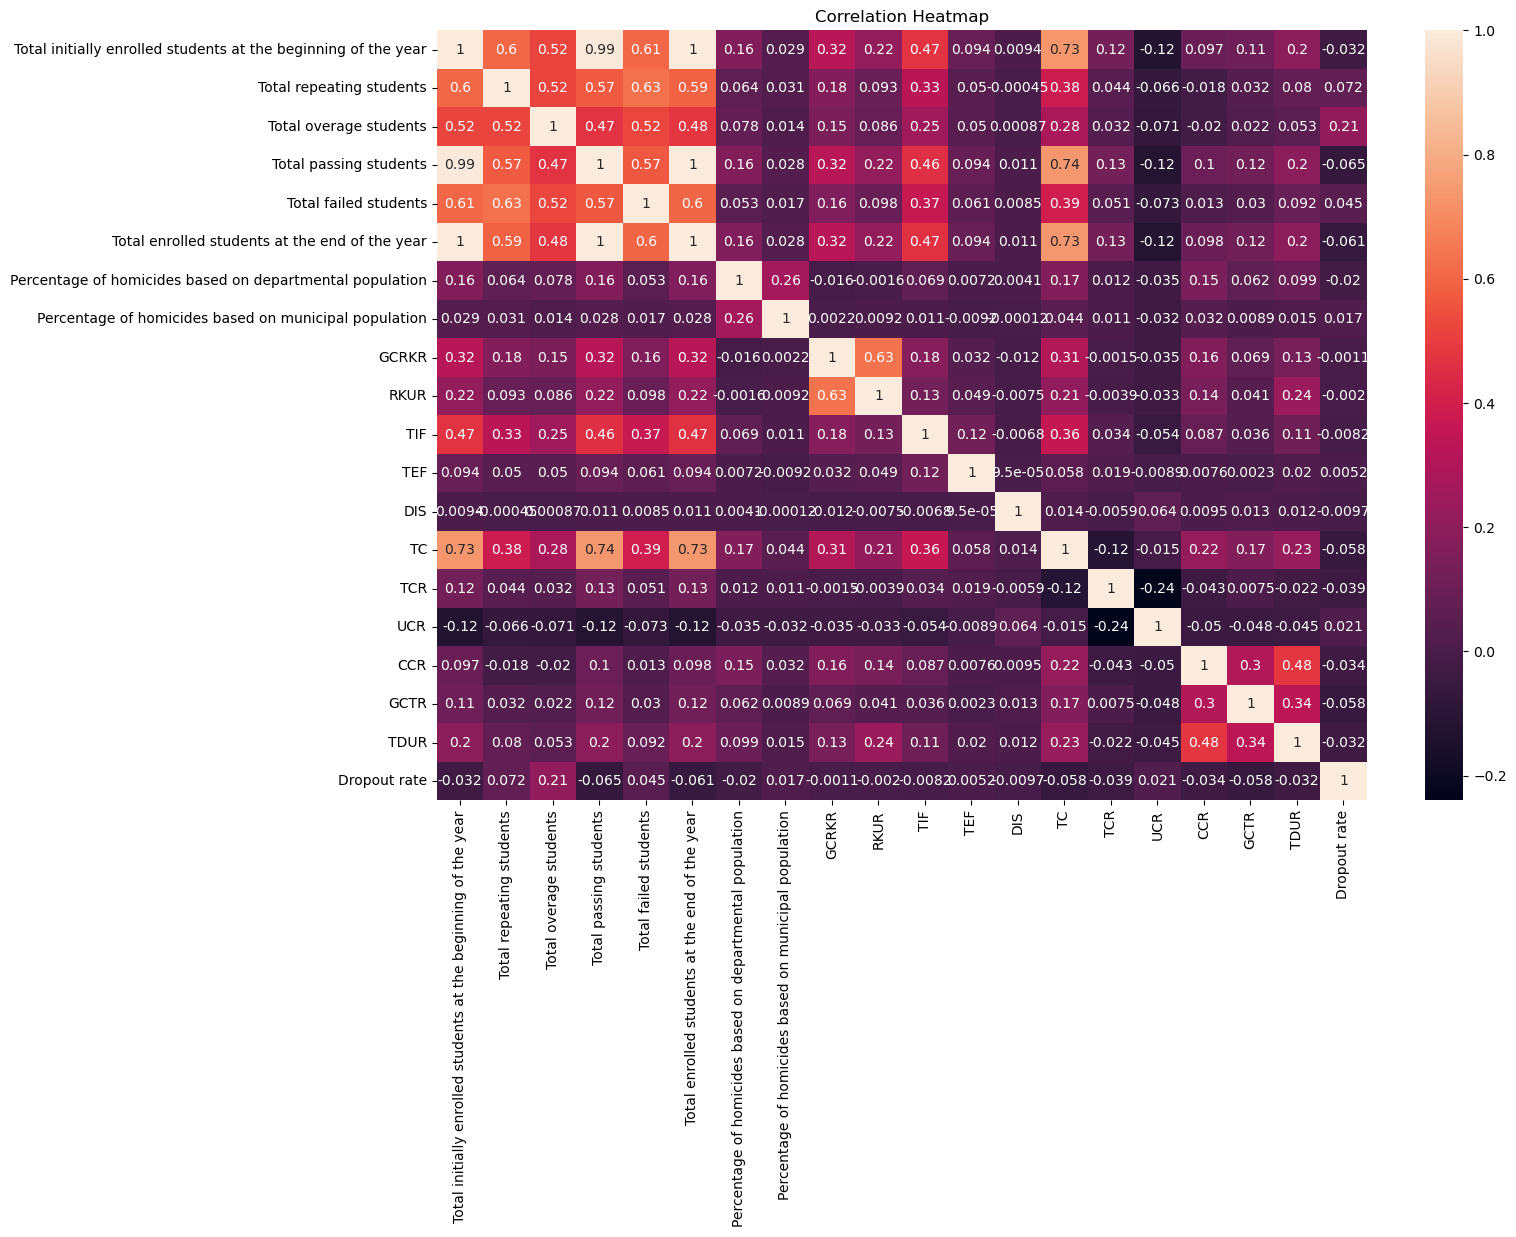

In [112]:
plot_correlation_heatmap(pd.concat([X_num, y], axis=1), '../reports/correlation.png', 'Correlation Heatmap', 20)